grdimage [WARNING]: (w - x_min) must equal (NX + eps) * x_inc), where NX is an integer and |eps| <= 0.0001.
grdimage [WARNING]: w reset from -25 to -25.0011971487
grdimage [WARNING]: (e - x_min) must equal (NX + eps) * x_inc), where NX is an integer and |eps| <= 0.0001.
grdimage [WARNING]: e reset from -13 to -12.9989911094
grdimage [WARNING]: (s - y_min) must equal (NY + eps) * y_inc), where NY is an integer and |eps| <= 0.0001.
grdimage [WARNING]: s reset from 63.2 to 63.1942135537
grdimage [WARNING]: (n - y_min) must equal (NY + eps) * y_inc), where NY is an integer and |eps| <= 0.0001.
grdimage [WARNING]: n reset from 66.7 to 66.7061712787


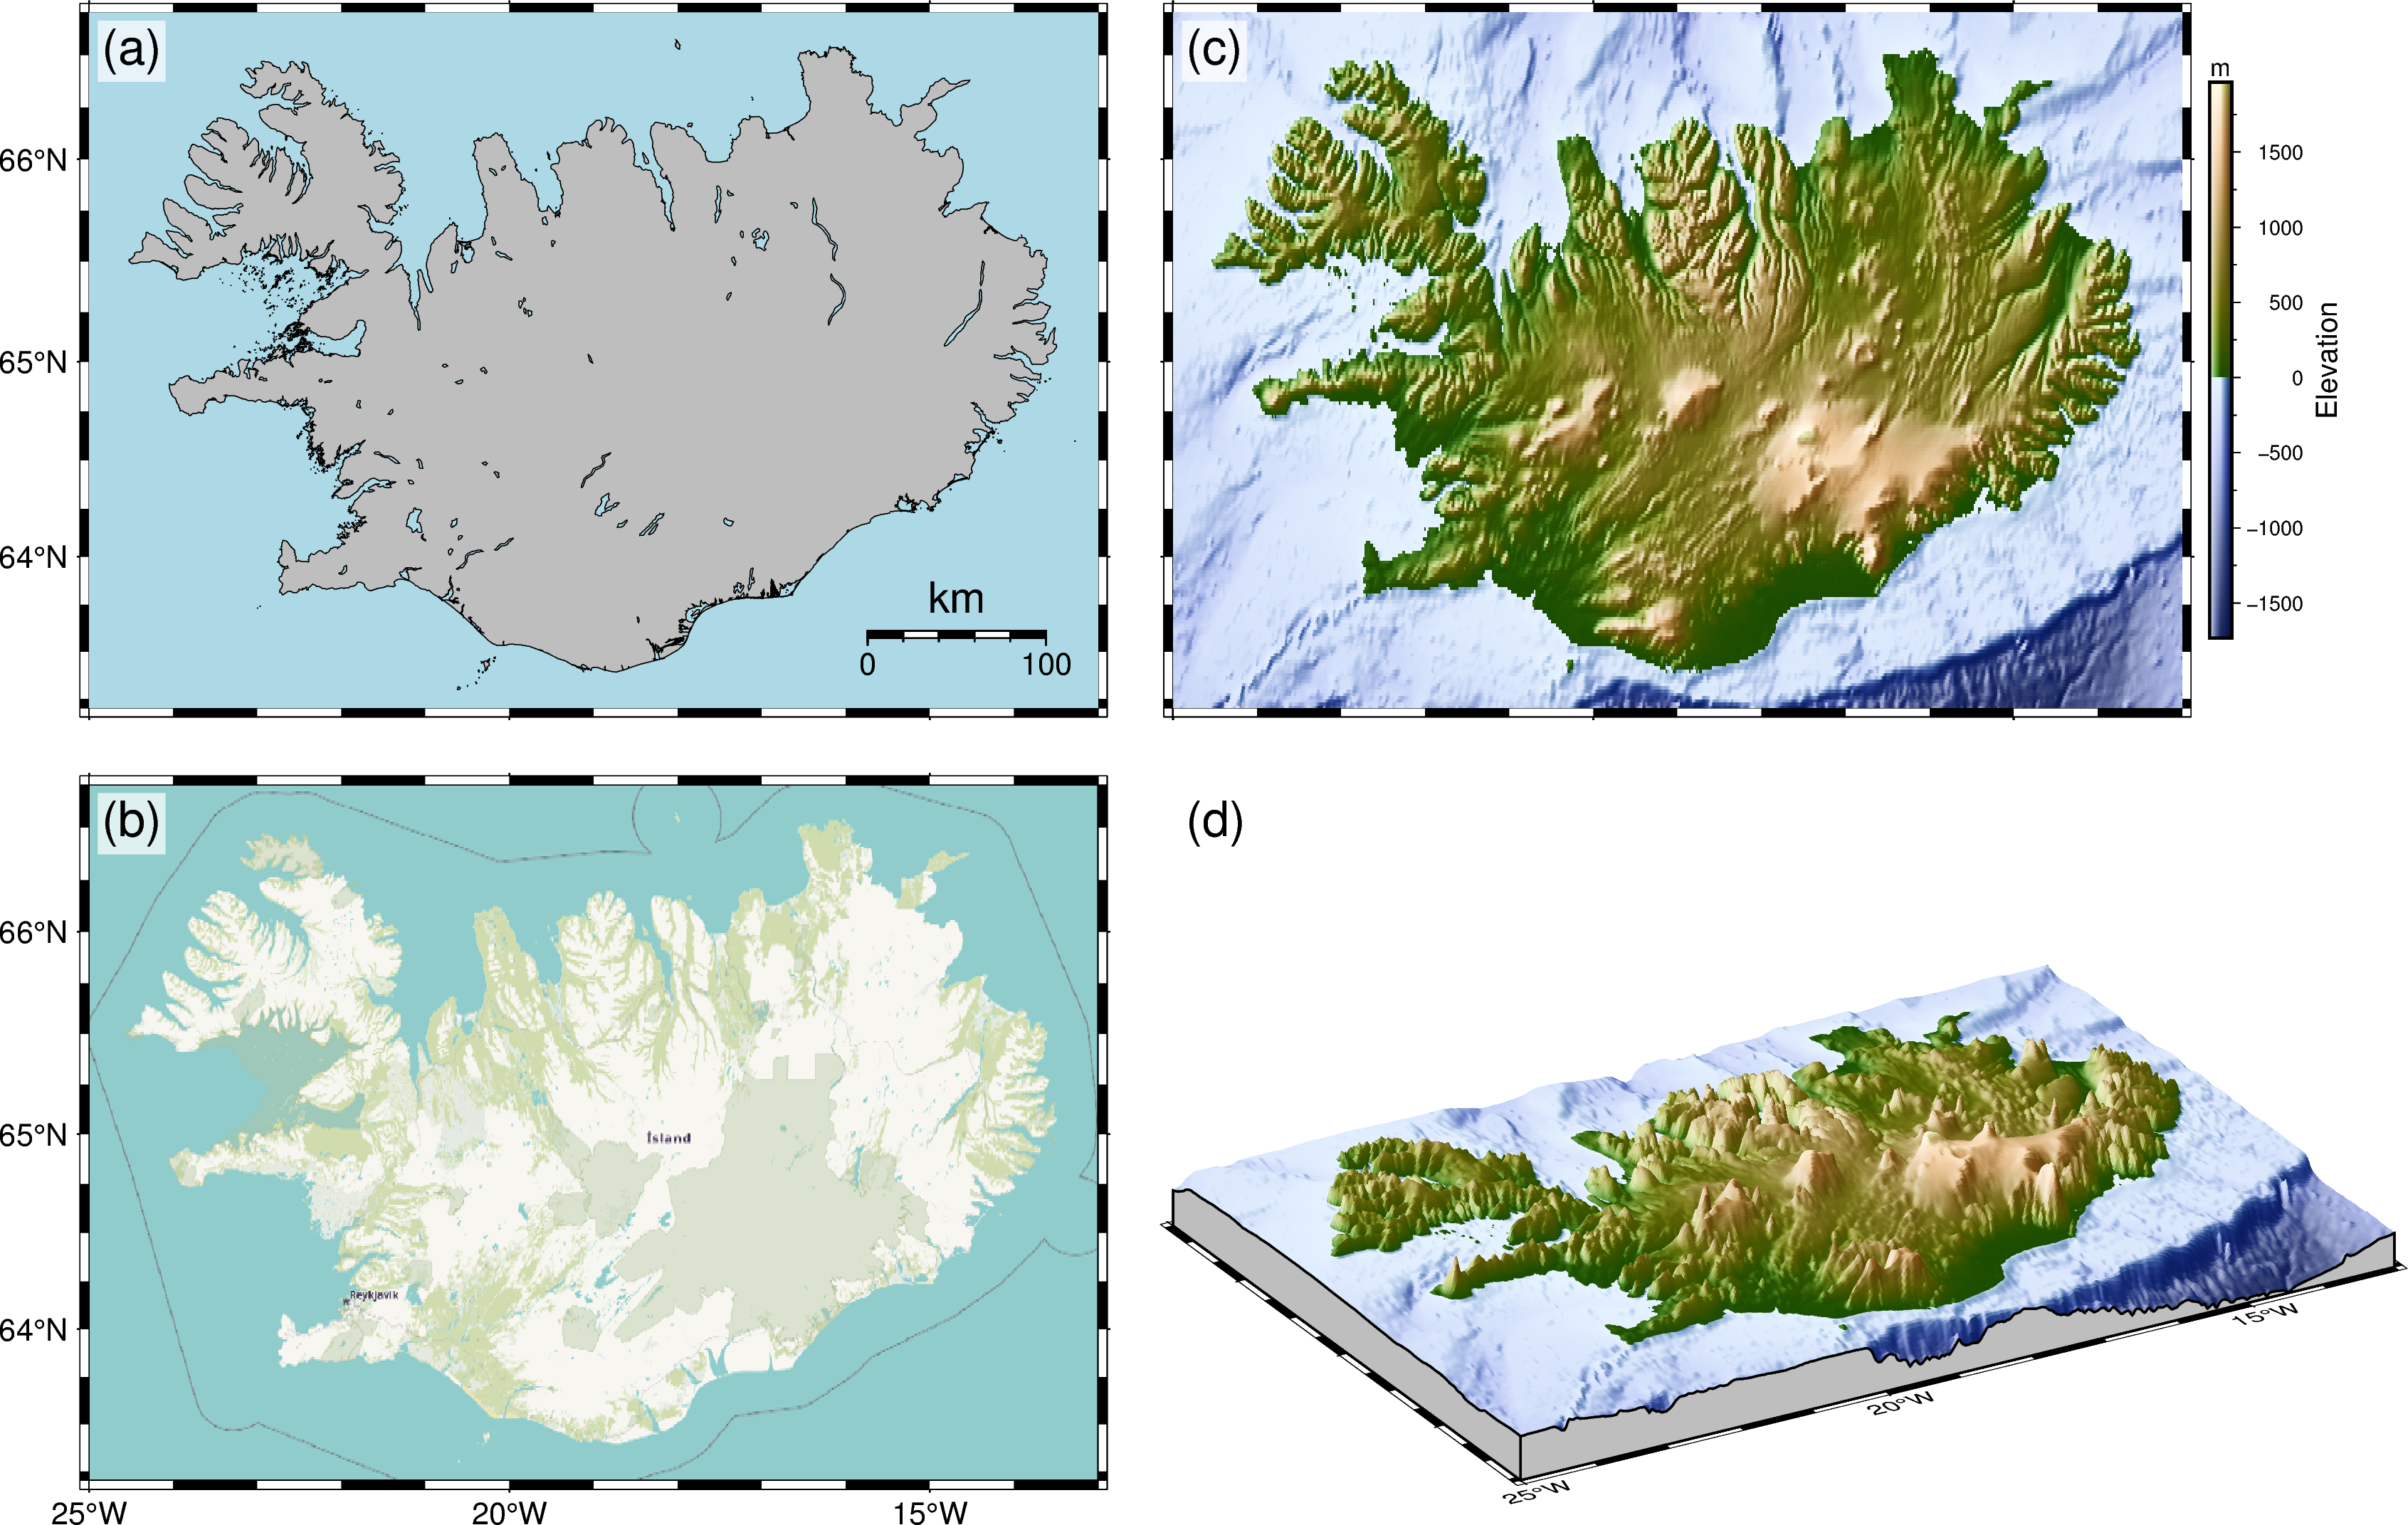

In [1]:
import pygmt

region = [-25, -13, 63.2, 66.7]

fig = pygmt.Figure()
with fig.subplot(
    nrows=2,
    ncols=2,
    subsize=("12c", "8.5c"),
    margins=("0.3c", "0.2c"),
    frame="WSen",
    sharex="b",
    sharey="l",
    autolabel="(a)+o0.15c/0.3c+gwhite@30+v",
):
    # Top left
    fig.basemap(region=region, projection="M?", panel=0)
    fig.coast(land="gray", water="lightblue", shorelines=True, resolution="high")
    fig.basemap(map_scale="n0.86/0.1+c+w100k+f+l")

    # Bottom left
    fig.tilemap(region=region, projection="M?", zoom=7, panel=1)

    # Top right
    grd_relief = pygmt.datasets.load_earth_relief(resolution="01m", region=region)
    fig.basemap(region=region, projection="M?", panel=2)
    fig.grdimage(grid=grd_relief, cmap="SCM/oleron", shading=True)
    fig.colorbar(frame=["xa500f250+lElevation", "y+lm"], position="JRM", shading=True)

    # Bottom right
    fig.basemap(region=region, projection="M?", perspective=(-150, 25), panel=3)
    fig.grdview(
        grid=grd_relief,
        cmap="SCM/oleron",
        surftype="s",
        shading=True,
        zsize="1.5c",
        plane="+ggray",
        perspective=True,
    )
fig.show()
# fig.savefig("Fig3_PyGMT_backgrounds.png")